In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler,StandardScaler
from scipy.sparse import hstack,csr_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import average_precision_score , roc_auc_score

In [2]:
df = pd.read_csv('raw_data_wlabels.csv').drop('Unnamed: 0',axis=1).dropna()

y = df['y']
xdata = df.drop('y',axis=1)

data_train,data_val,ytrain,yval = train_test_split(xdata,
                                                    y,
                                                    test_size = 0.5,
                                                    random_state=0)

In [3]:
# Vetorizando as features de texto
title_train = data_train['titles']
title_val = data_val['titles']

title_vec = TfidfVectorizer(min_df = 2,ngram_range=(1,1))

title_bow_train = title_vec.fit_transform(title_train)
title_bow_val = title_vec.transform(title_val)

autor_train = data_train['author']
autor_val = data_val['author']

autor_vec = TfidfVectorizer(min_df = 2,ngram_range=(1,1))

autor_bow_train = title_vec.fit_transform(autor_train)
autor_bow_val = title_vec.transform(autor_val)

In [4]:
mask_train = data_train.drop(['titles','author'],axis=1)
mask_val = data_val.drop(['titles','author'],axis=1)

xtrain_wvec = hstack([title_bow_train,autor_bow_train,mask_train])
xval_wvec = hstack([title_bow_val,autor_bow_val,mask_val])

In [5]:
# Convertendo as features vetorizadas para matrizes csr
xtrain_wvec2 = csr_matrix(xtrain_wvec)
xval_wvec2 = csr_matrix(xval_wvec)

In [6]:
# Normalizando os dados
scaler = MaxAbsScaler()

xtrain_wvec2 = scaler.fit_transform(xtrain_wvec2)
xval_wvec2 = scaler.transform(xval_wvec2)

# Regressão Logística

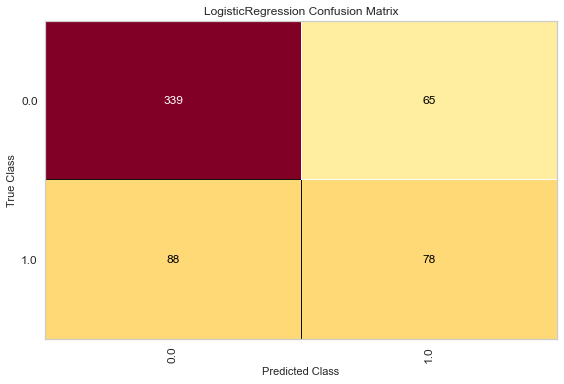

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [7]:
lr = ConfusionMatrix( LogisticRegression(C=30,n_jobs=6,random_state=0))
lr.fit(xtrain_wvec2,ytrain)
lr.score(xval_wvec2,yval)
lr.poof()

In [8]:
p = lr.predict_proba(xval_wvec2)[:,1]

In [11]:
print(f'Logistical Regression Metrics \nAVG : {average_precision_score(yval,p)} \nROC : {roc_auc_score(yval,p)}')

Logistical Regression Metrics 
AVG : 0.5169900249550464 
ROC : 0.7117976857926757
